In [280]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd
from scipy import stats

# standard packages used to handle files:
import sys
import os 
import glob
import time

# scikit-learn machine learning library:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


#machine learning library
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from kerastuner.tuners import Hyperband
from keras_tuner import RandomSearch

Define your folder structure with your data:

In [249]:
data_folder = "./"

import training and test data

In [250]:
train_data = pd.read_csv(data_folder + "training_data.csv")
test_data = pd.read_csv(data_folder + "test_data.csv")

### Data exploration
Let's take a look at our train and test data:

In [251]:
train_data.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [252]:
train_data.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000
mean,333.816039,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.060069,0.001185
std,427.064175,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.299763,0.031198
min,-18.490000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000,0.000000
25%,24.459999,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000,0.000000
50%,170.530000,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000,0.000000
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000,0.000000
max,2051.120100,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,8.060000,2.080000


In [253]:
print(len(train_data))

208910


This table is great since we can see the different percentiles and the min and max. We can see that the values are pretty thight together. There does not seem to be any extreme values such that it could be an equipment malfunction which we would have to filter out.

#### Correlation matrix

One important aspect to understanding the data is the correlation between each variables. How each variables can be explained by another. Hence we can see what variables seem to influence the most the active_power which is the target variable.

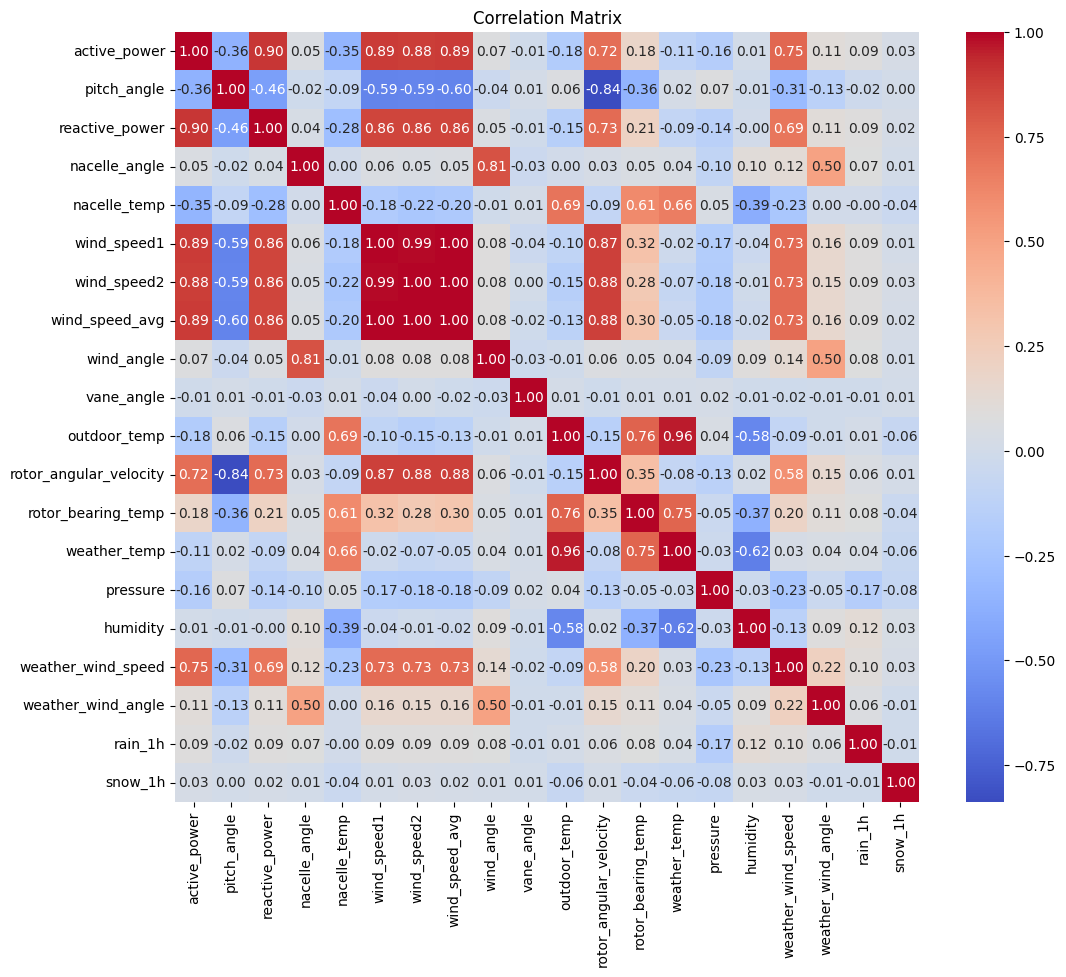

In [254]:
y = train_data['active_power']

X = train_data.drop(['timestamp'], axis=1)
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


From the heatmap, we can clearly see that some of the variables are higly correlated. Such variables are wind_speed1 and wind_speed2 with wind_speed_avg for instance. This is expected as they are either providing data on the same wind infomration (speed) or is a combination of both. Choosing one of the three could help reduce redudant information and reduce the risk of multicolinearity. Let's look at which variables are correlated with the target variable more thorougly.

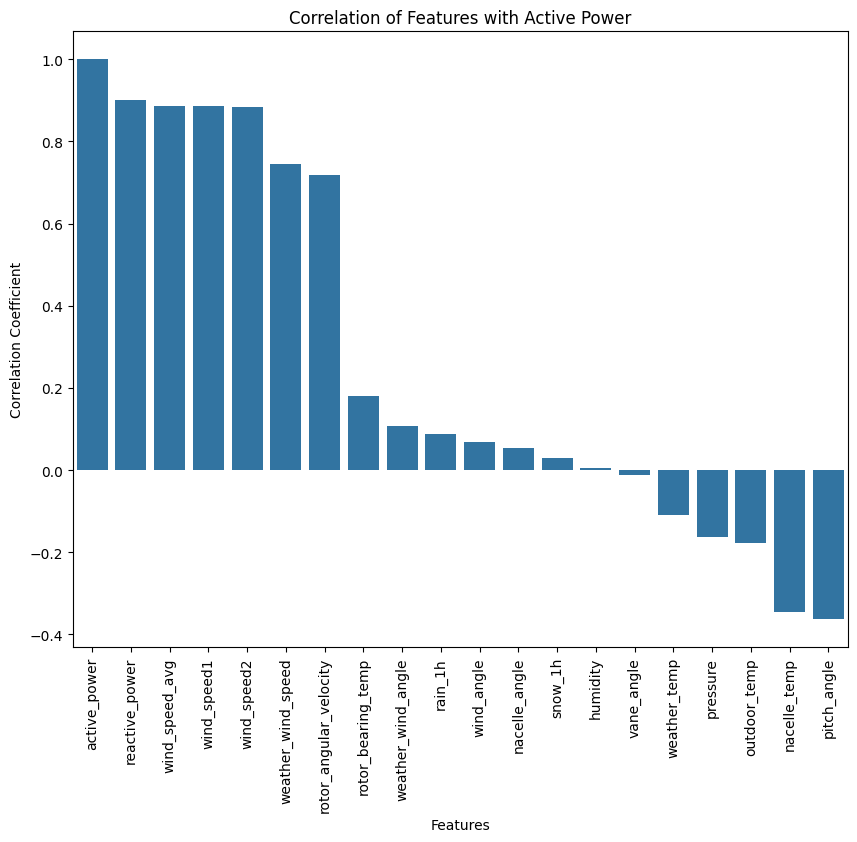

In [255]:
target_corr = correlation_matrix['active_power'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Active Power")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

As we can see from this graph, some variables are of greater importance to active power. Reactive power, the speed of wind and the rotor angular velocity influence greatly the generation of power. On the other hand, variables like rain and snow do not influence a lot the active power. On the other hand. variables like pitch angle and nacelle temp seem to influence negativly the active power but, their correlation is still small.

#### Percentile and abnormal data exploration

I will try and see if there are any abnormal data. Such abnormal data are data points that do not make any sense either by being aberant (a single data point) or either by just not making any sense with respect to the context in which we are performing this analysis (wind turbine).

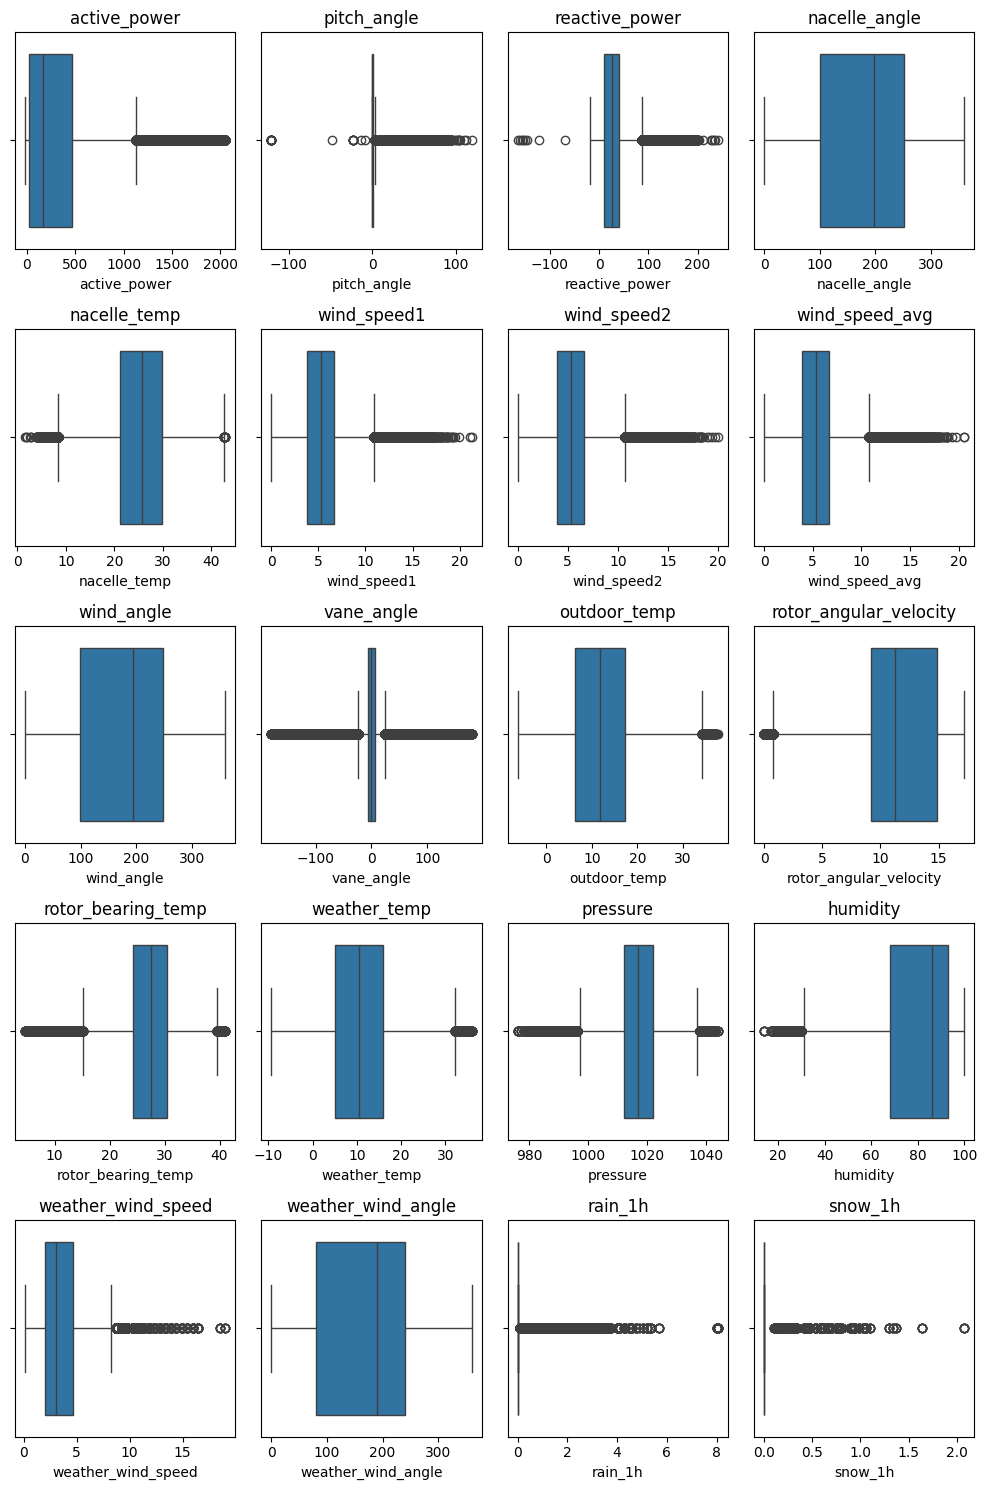

In [256]:
plt.figure(figsize=(10, 15))  

boxplot_data = train_data.drop(['timestamp'],axis=1)
n_rows = 5
n_cols = 4


for i, column in enumerate(boxplot_data.columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(x=boxplot_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

From the boxplots we can see that the data is well distributed in the most part. But some feature are present with some data point which do not seem to be fitting with the rest of the data points in the same column. For instance, in active_power, we have a couple of points above the 3rd quarter + 1.5* interquatile. Normally such points are considered outliers as they do not represent our data well. But in this case, the data goes up to around 2000KW which is totally normal for our scenario. So such points are not considered outliers which is why we have to be careful before considering the outside dark points outliers. Same thing goes for pressure, wind speed, vane angle, temp... It is normal for the wind to go up to 20 m/s, it just means it is a rare scenario same for pressure and all. We have to keep those datapoints as they are normal in the context of wind turbine operations. 

Where it is strange to see some points outside the normal quartile distribution is in reactive power. We can see some negative values. After some online search, I was able to confirm that reactive power can be negative. This reactive power occurs when the voltage and current in an AC circuit are not in phase with each other. Negative reactive power occurs in when the power is flowing from the load to the source. Which can occur in a wind turbine. For more information on that matter, check out this website: [Reactive Power](https://control.com/technical-articles/active-power-reactive-power-apparent-power-and-the-role-of-power-factor/)

For now, our data seems to make sense, with values in the normal operating range. Let's see if we have any missing values.

In [257]:
nan_count = train_data.isna().sum().sum()

print("Total number of NaN values in the DataFrame:", nan_count)

Total number of NaN values in the DataFrame: 0


We can see that our data is complete, there are no missing values which is great. So now we know that we do not have any missing values, we know which features influence the most our active_power and we know that our data makes sense in the context of wind turbines.

#### Feature selection

Let's take a look at our first year of datapoints in the training set:

<Figure size 1000x1000 with 0 Axes>

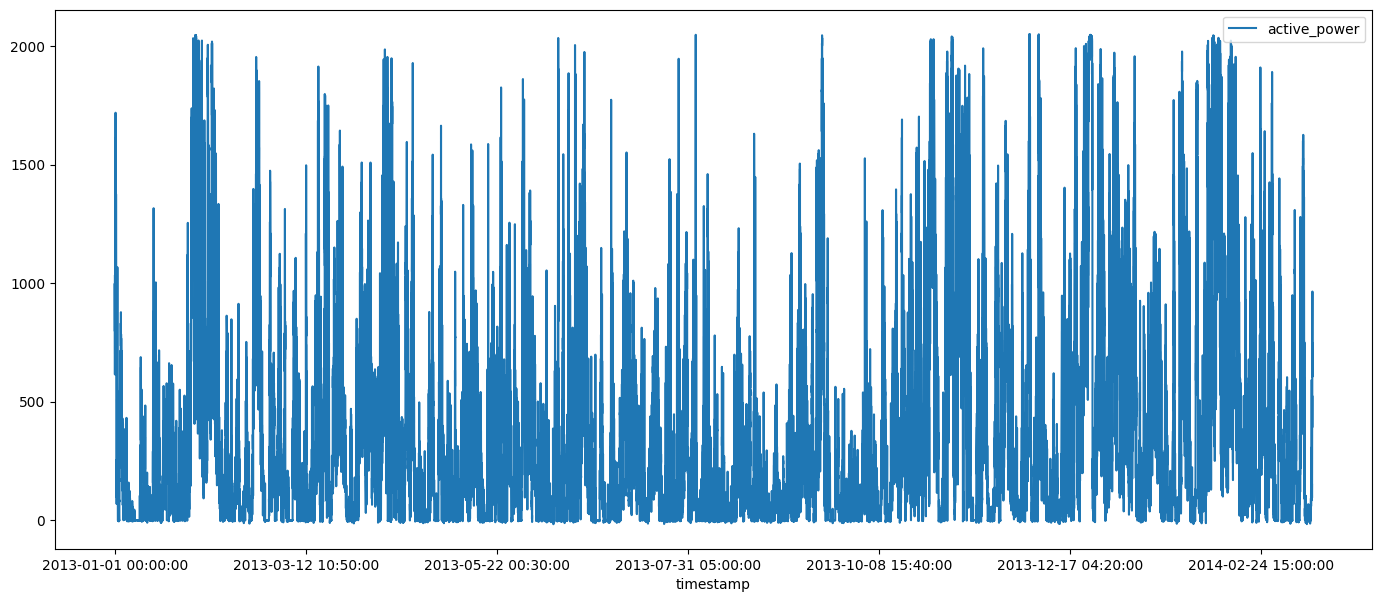

In [258]:
plt.figure(figsize=(10,10))
## approximately one year
train_data[0:train_data.size//70].plot(x="timestamp", y="active_power", figsize=(17,7))
plt.show()

The timestamp does not seem to show any sort of trend, seasons or cycle. For each month the are different spikes and it seems to be pretty monotonic between 0 and 2100 KW. We can drop the timestamp from our data as it does not provide any useful information

Furthermore, from looking at the correlation matrix we could choose the following columns as important features:reactive_power,wind_speed_avg,rotor_angular_velocity,weather_wind_speed

#### Normalization choice

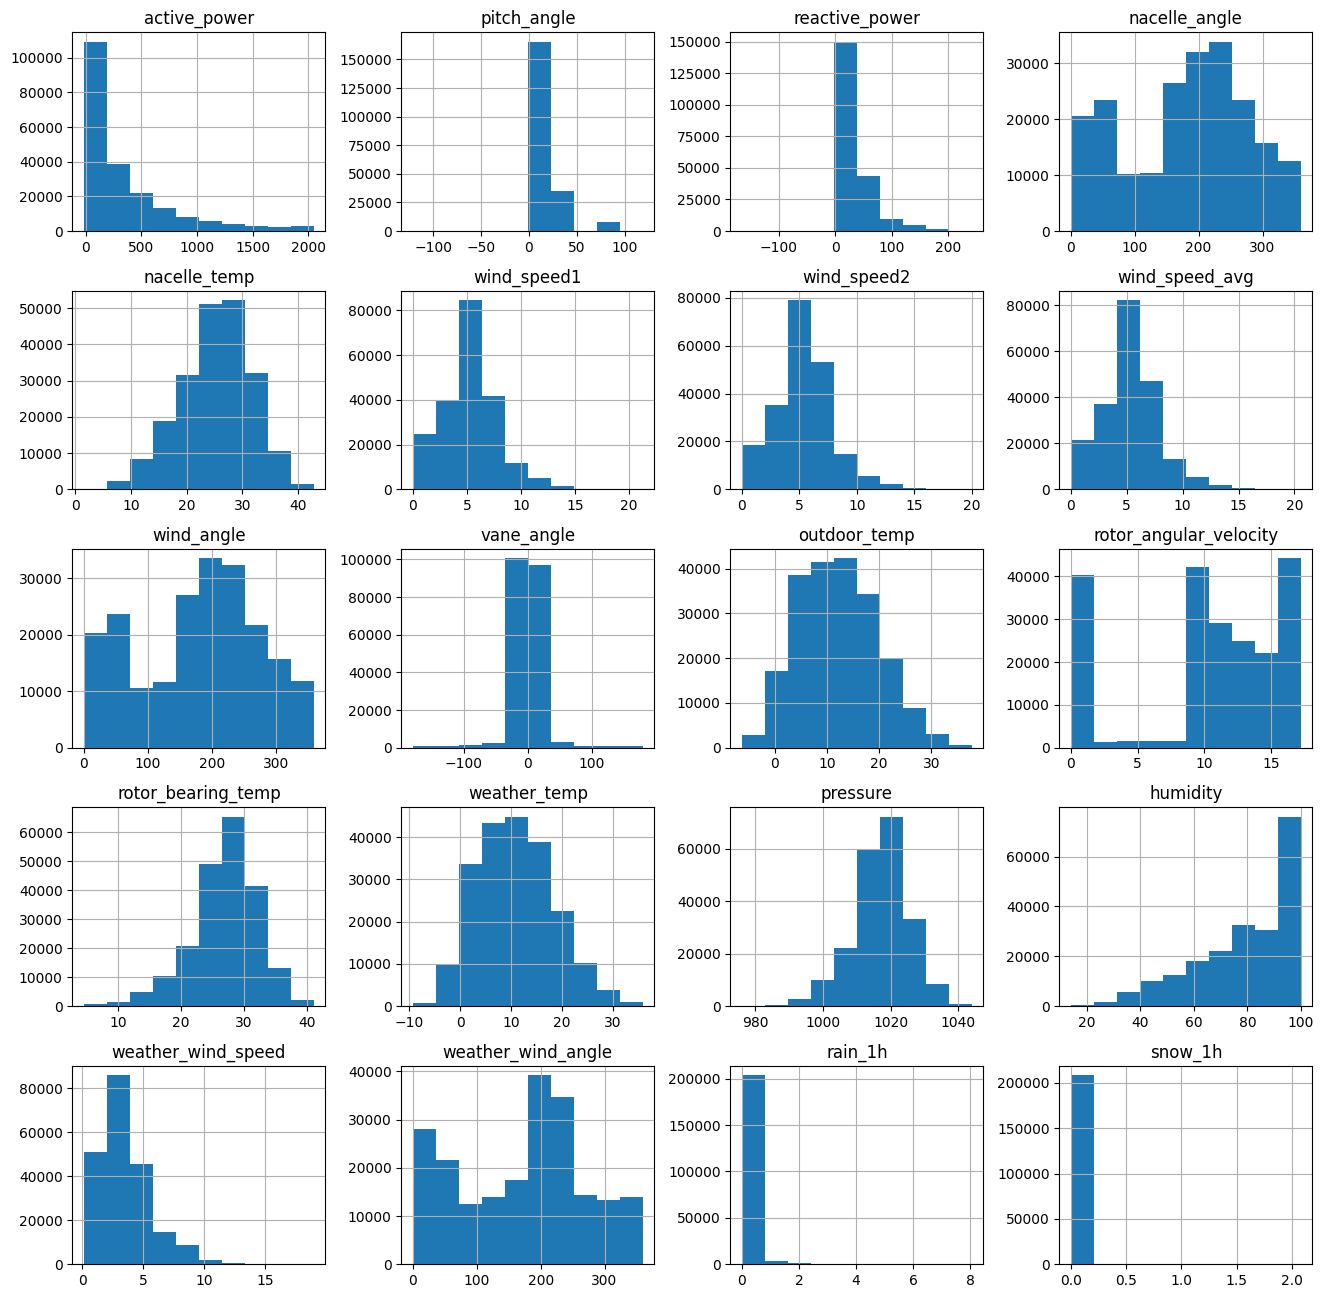

In [259]:
train_data.hist(figsize = (16,16)) # figsize: (width,height)
plt.show()

From the histogram, we can see that the data is very much normally distributed. If you look at wind_speed_avg for instance, you can see a clear normal distribution. This might come in handy later on when we will want to normalize our data. Futhermore, the barplots help us see that there are no abberant or extreme values as the scales would be much bigger and a column representing the abberant value would be visible on either one of the end of each plot.

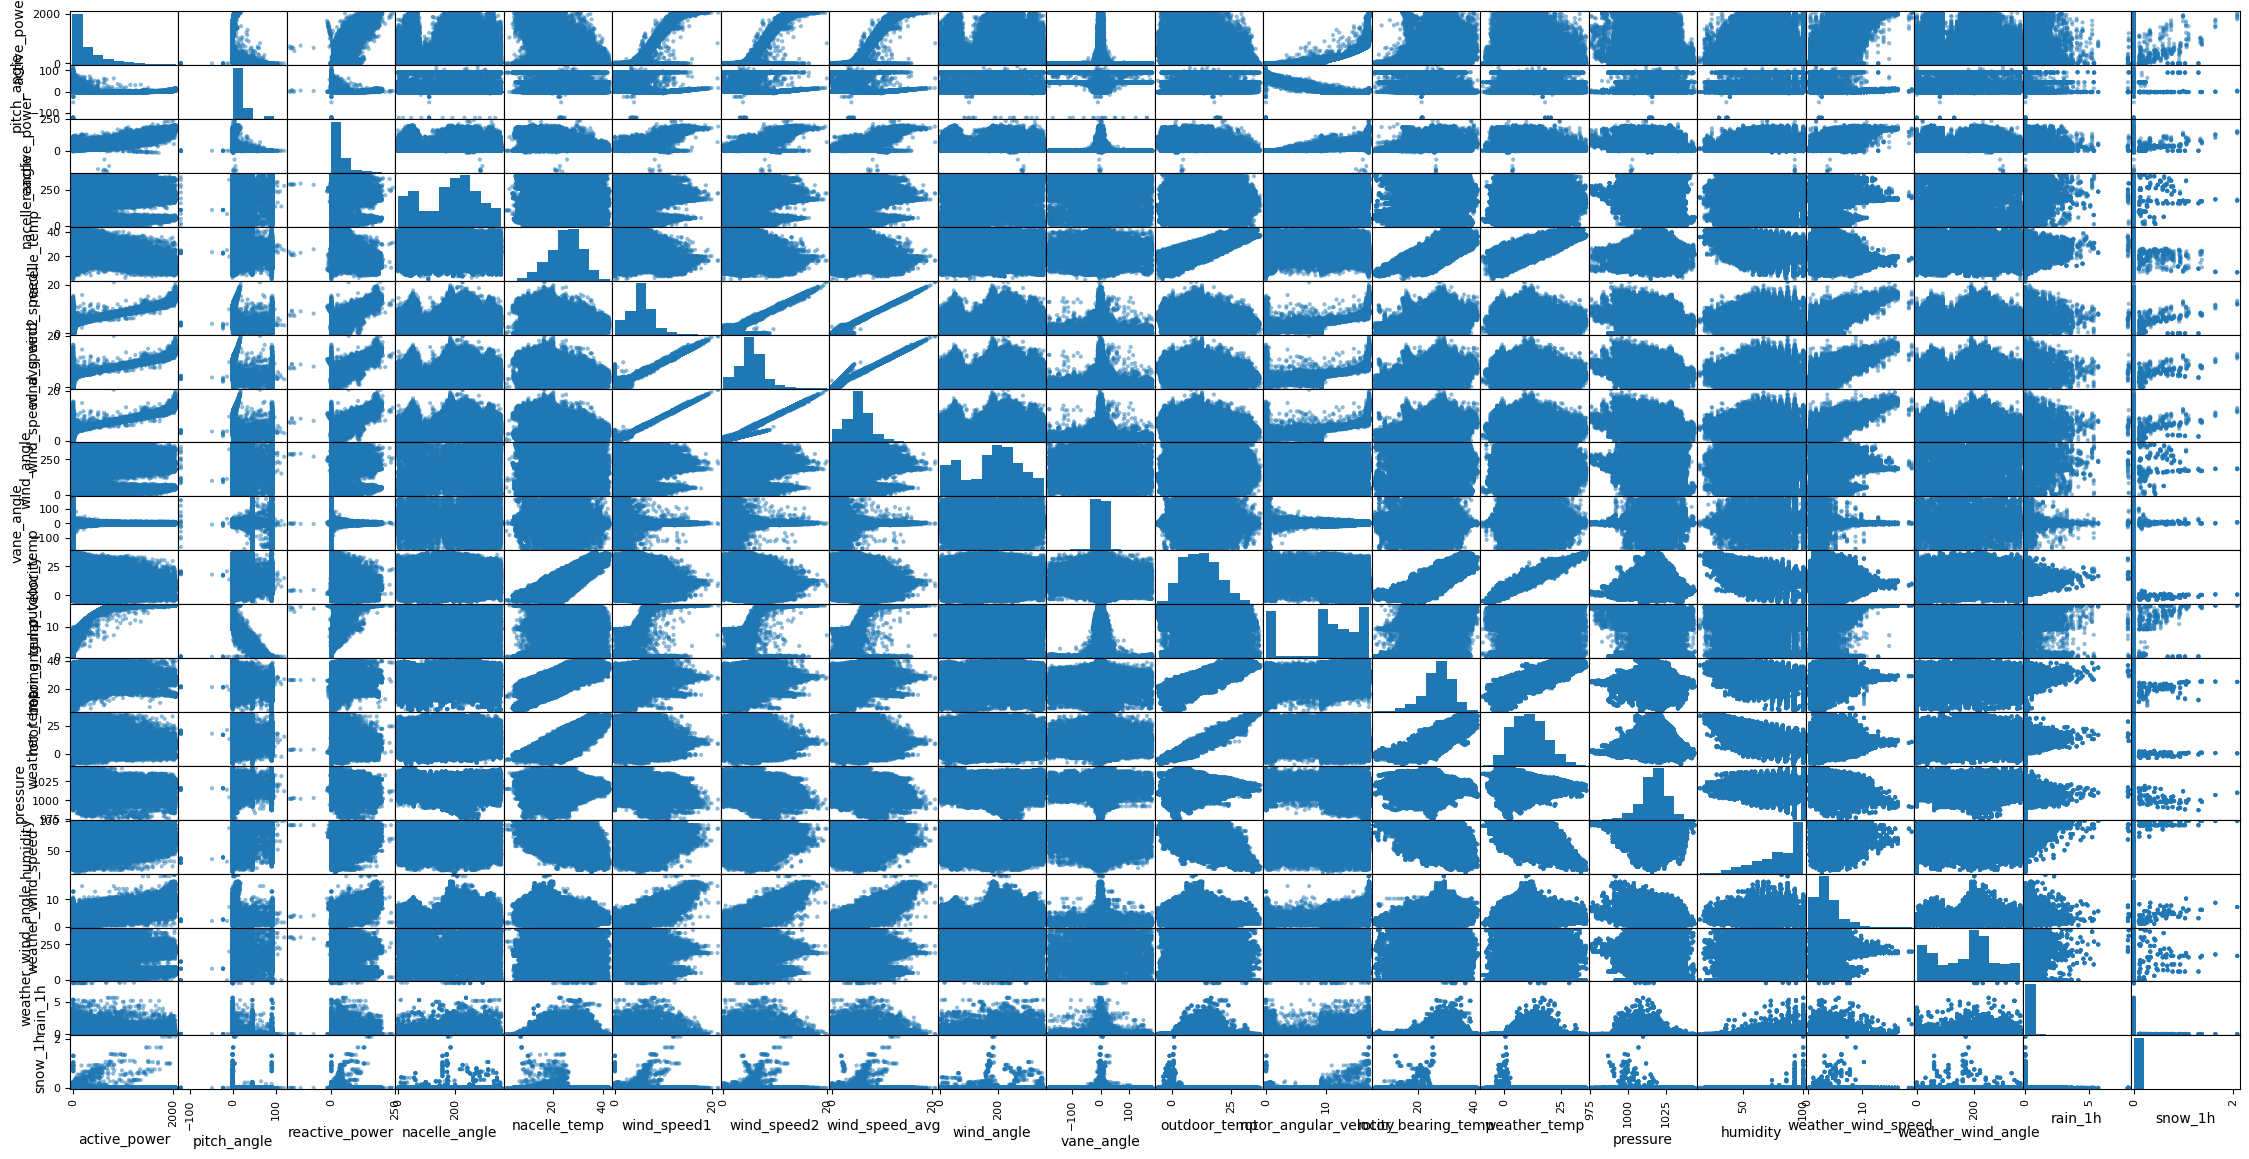

In [97]:

scatter_matrix(train_data,figsize = (28,14))
plt.show()

This figure is not that usefull in understanding the data but from the relations from each columns to each columns we can see some type of relations. We can see some sort of linear dependences between some variables ie, nacelle_temp and outdoor temp or the different wind_speed for instance. Those indicate that our data makes senses as different data providing similar information should be linearly dependent. But what we are interested in is the active power. We can see an interesting relation between the wind speed and active power. For instance, the relation between the wind speed with respect to the active power seems linear in its majority with a curbature at one end and a stack of values at the other end. The inverse relation, active power with respect to wind speed shows the same kind of relation, linear in 3 different part. This kind of looks like a sigmoid function except it is not between 0 and 1. It could be a good starting point to try and linearly predict the active power with the wind speed. 

We can also see a great relationship between active power and angular velocity. This is expected as when the turbine spins faster, we expect to generate more power. 

Another feature that can be influencial by the clear relation ship we see is reactive power with respect to active power. When we look at the graph (3,1) 3rd row 1st column, we can see that they are somewhat linearly dependent.On the other hand, the inverse relationship tends to curve which looks more like a logartihmic function. Maybe some data modification could be applied to the relation ship such as a log transform to create a linear dependence.

Next, I will try and look at the wind speed variable. As we can see, there is a combination of 3 different wind speed (1,2 and average). It might not be important to include the 3 of them in our feature selection for training our models. 

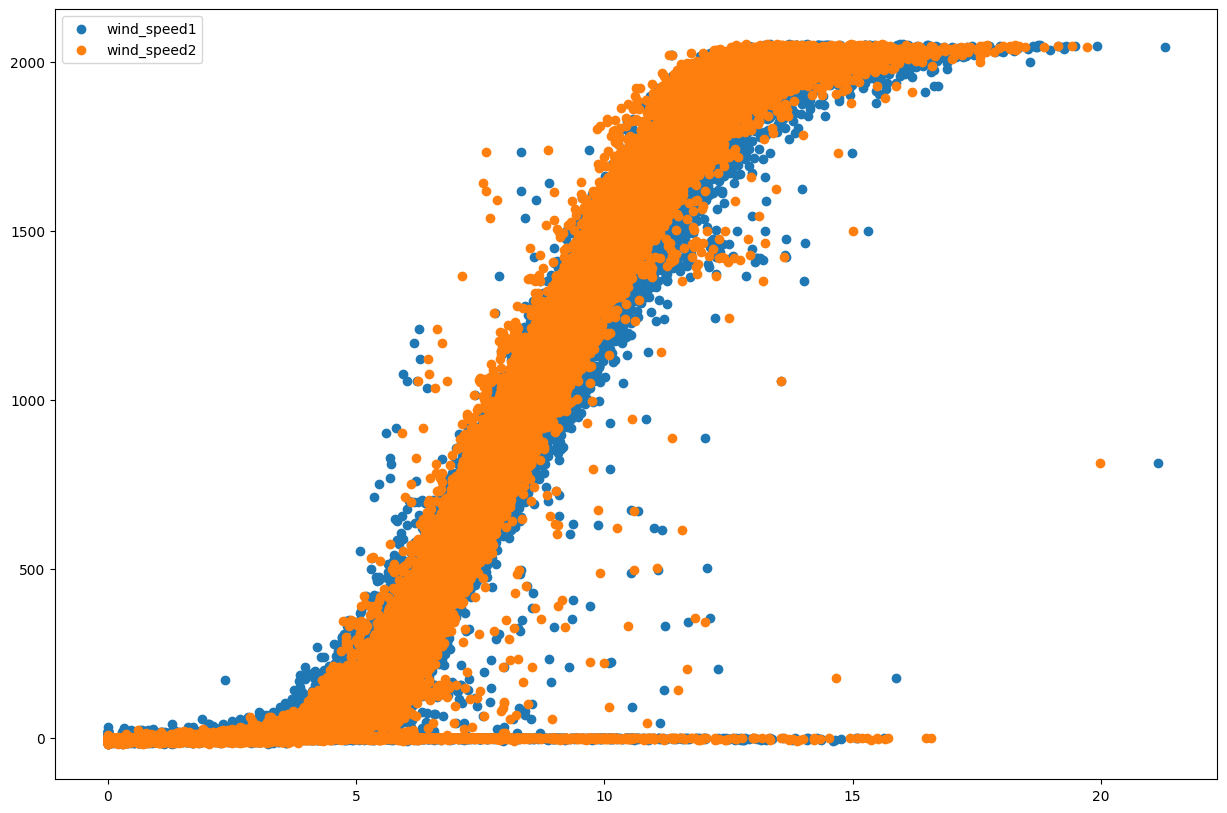

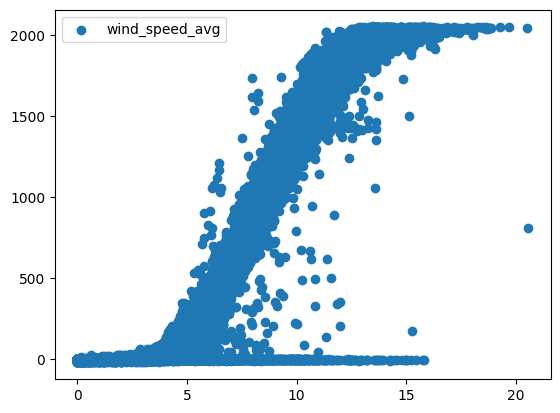

In [260]:

plt.figure(figsize=(15,10))
plt.scatter(X['wind_speed1'],y,label='wind_speed1')
plt.scatter(X['wind_speed2'],y,label='wind_speed2')
plt.legend()
plt.show()
plt.scatter(X['wind_speed_avg'],y,label='wind_speed_avg')
plt.legend()
plt.show()

We can see that their values are very similar. They follow the same type of curve. What could be interesting to see is if for some values of wind speed, there is a malfunction of either one of the speed sensors. Let's look at that. 

In [261]:
threshold = 2.5
X['wind_speed_difference'] = X['wind_speed1'] - X['wind_speed2']
X['discrepancy_tag'] = (X['wind_speed_difference'] > threshold) | (X['wind_speed_difference'] < -threshold)
discrepancy_data = X[X['discrepancy_tag']== True]
print(len(discrepancy_data))
discrepancy_data.head()


626


,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,...,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h,wind_speed_difference,discrepancy_tag
1203,0.00,89.989998,0.0,36.849998,6.00,0.0,3.00,1.50,348.07999,-48.799999,...,6.96,0.58,1024.0,100.0,1.54,230.0,0.0,0.0,-3.00,True
1204,-0.34,89.989998,0.0,36.849998,5.90,0.0,2.96,1.48,347.31000,-49.509998,...,6.91,0.58,1024.0,100.0,1.54,230.0,0.0,0.0,-2.96,True
1205,-0.02,89.989998,0.0,36.849998,5.88,0.0,2.69,1.35,353.04001,-43.830002,...,6.90,0.58,1024.0,100.0,1.54,230.0,0.0,0.0,-2.69,True
1206,0.00,89.989998,0.0,36.849998,5.67,0.0,3.37,1.68,352.76001,-44.099998,...,6.89,0.53,1024.0,100.0,2.06,240.0,0.0,0.0,-3.37,True
1207,-0.61,89.989998,0.0,36.849998,5.61,0.0,3.15,1.58,349.45999,-47.389999,...,6.86,0.53,1024.0,100.0,2.06,240.0,0.0,0.0,-3.15,True


It is intersting to see that for some values of wind speed in the second sensor, we can see that there is no values in the first sensor.

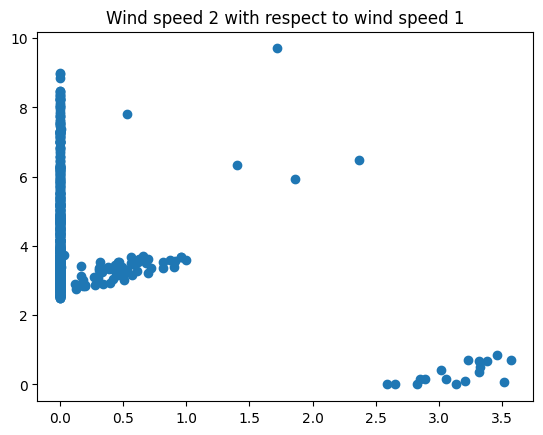

In [262]:
plt.scatter(discrepancy_data['wind_speed1'],discrepancy_data['wind_speed2'])
plt.title('Wind speed 2 with respect to wind speed 1')
plt.show()

Interesting enough, we can see that for a small amount of values at a fixed threshold different of 2.5 meters per second, there are some discrepency between the data.

Since we have such a small proportion of those points (626/208910) we cannot be sure which sensor is faulty in those cases. It is better not to to assume things here and leave them there. This is where the average of both comes in handy

In the end, our data is pretty clean. There are no abnormal points or very few which we can deal with with a good data normalization and models which are not sensitive to very small amount of noise.

## Data preprocessing

In [263]:
#In case we need a copy futher on
X_copy = X.copy()

In [264]:
X = X.drop(['wind_speed_difference','discrepancy_tag'],axis=1)

In [265]:
test_data.head()

,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,2016-12-31 04:20:00,0.50,2.07,185.73,16.370001,1.61,3.50,2.56,199.31000,13.660000,3.75,9.229999,17.230000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
1,2016-12-31 04:30:00,0.21,2.77,185.73,16.790001,2.09,3.59,2.84,194.61000,8.850000,3.80,9.229999,17.379999,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
2,2016-12-31 04:40:00,0.50,5.84,185.73,17.209999,1.08,3.34,2.21,192.75000,6.970000,3.90,9.229999,17.549999,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
3,2016-12-31 04:50:00,0.50,6.25,185.73,17.480000,0.91,3.45,2.18,180.42999,-5.360000,3.80,9.229999,17.680000,-5.06,1034.0,93.0,1.03,0.0,0.0,0.0
4,2016-12-31 05:00:00,0.27,2.57,185.73,17.809999,2.00,3.51,2.75,168.67999,-17.049999,3.54,9.229999,17.830000,-5.49,1034.0,93.0,0.51,0.0,0.0,0.0


In [266]:
X.head()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,0.16,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,2.33,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,7.01,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,8.05,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,4.40,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


Drop the timestamps as they are not needed in our training and testing

In [267]:
test = test_data.drop('timestamp',axis=1)

In [ ]:
#remove target column
X = X.drop('active_power',axis=1)

In [275]:
X.describe()

,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000
mean,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.060069,0.001185
std,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.299763,0.031198
min,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000,0.000000
25%,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000,0.000000
50%,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000,0.000000
75%,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000,0.000000
max,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,8.060000,2.080000


In [276]:
test.describe()

,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000,52228.000000
mean,11.500299,30.960179,188.284162,24.792812,5.400713,5.409807,5.405269,184.955809,1.032532,12.198294,10.367552,28.181708,10.710511,1017.984778,79.254653,3.659871,179.375986,0.081530,0.001968
std,24.646590,33.346812,89.192680,7.177239,2.803835,2.582878,2.682415,89.605905,26.093883,7.919119,5.681166,5.985329,7.858071,7.963077,18.039820,2.277288,94.270012,0.370563,0.047588
min,-1.000000,-13.530000,0.100000,1.190000,0.000000,0.000000,0.000000,0.000000,-179.740000,-7.970000,0.000000,-0.210000,-10.700000,978.000000,20.000000,0.210000,0.000000,0.000000,0.000000
25%,-0.990000,8.430000,141.830000,20.799999,3.850000,3.950000,3.880000,130.435000,-5.420000,6.190000,9.229999,25.889999,5.040000,1014.000000,68.000000,2.060000,110.000000,0.000000,0.000000
50%,-0.970000,23.930000,205.490000,25.660000,5.370000,5.370000,5.370000,202.930000,0.160000,11.700000,11.320000,28.920000,10.150000,1018.000000,86.000000,3.090000,200.000000,0.000000,0.000000
75%,2.152500,37.939999,247.200000,29.850000,6.760000,6.670000,6.710000,244.110000,6.250000,17.940000,15.022500,32.010000,16.250000,1023.000000,93.000000,5.140000,240.000000,0.000000,0.000000
max,132.480000,264.060000,359.950010,42.790000,22.140000,21.210000,21.670000,359.989990,179.680000,35.290000,17.210000,43.070000,34.590000,1039.000000,100.000000,16.980000,360.000000,8.000000,2.650000


In [277]:
selected_columns = ['reactive_power','wind_speed_avg','rotor_angular_velocity','weather_wind_speed']

#### Data normalization

In [278]:
scaler = RobustScaler(quantile_range=(25, 75))
#scaler = StandardScaler()

standardized_data = scaler.fit_transform(X)
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

standardized_test_data = scaler.transform(test)


Here I opted in my final pipeline to go with a RobustScaler rather than a standard scaler. After multiple attemps with a variety of scalers such as min/max, normal and robust, this one worked the best. Normal scaler was great but yet it lacked the key feature of the robust scaller that takes into account aberant data points and normalizes better with those.

# Models training, test-split and parameter tuning

In [279]:
X_full_train, X_test, y_full_train, y_test = train_test_split(standardized_df, y, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, 
                                                                  y_full_train, 
                                                                  test_size=0.2, 
                                                                  random_state=3)

I opted for two split strategy. The first line is splitting all dataset in training and testing set. The second subdivises again the first training set. The idea behind that is to use the second set of train-val to inspect the models with less data before going on with the full data set. This is usefull for small models like linear regression and gradient boosting as you will see to check if there are promissing results before going on with the full dataset.

Also, dividing the data here is crucial as we do not want any leakage in our training. We split once and we use. This way we prevent any sort of data manipulation or the risk of having testing data in our training data.

#### Linear regression

I will start by looking at a simple linear regression with the selected columns and all columns to see their different performance.

In [281]:
model = LinearRegression()

model.fit(X_train[selected_columns], y_train)


LinearRegression()

In [284]:
y_pred = model.predict(X_val[selected_columns])
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_val, y_pred)
print('Mean absolute Error:', mae)


r2 = r2_score(y_val, y_pred)
print('Coefficient of determination:', r2)

Mean Squared Error: 23086.748261368604
Mean absolute Error: 117.82182242964481
Coefficient of determination: 0.8748645814594195


We can see that with the selected columns we have model that is not performing that well. Let's try with more data

In [286]:
model = LinearRegression()
model.fit(X_full_train[selected_columns],y_full_train)
y_pred = model.predict(X_test[selected_columns])
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error:', mae)


r2 = r2_score(y_test, y_pred)
print('Coefficient of determination:', r2)

Mean Squared Error: 22982.292919960633
Mean absolute Error: 118.44421212758235
Coefficient of determination: 0.8741410218530339


With more data, the model performed even worse! Let's try with all the columns

In [288]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_val, y_pred)
print('Mean absolute Error:', mae)


r2 = r2_score(y_val, y_pred)
print('Coefficient of determination:', r2)

Mean Squared Error: 16634.13554841631
Mean absolute Error: 95.34550381201366
Coefficient of determination: 0.9098392077417476


In [ ]:
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs Actual')

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', label='Ideal Model')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Model Line')
plt.legend()
plt.show()


With all the columns, the model performs better. We are above the average power submission but bellow the manufacturer curve. This is normal, we are trying to predict a non-linear value with a linear model. Yet, we can see that it is not half bad. The coefficient of determination is high 0.9098 which is a good indicator that the line fits the data well. But we can do a lot better than a simple linear regression

#### Random forest regressor

I will train a random forest regressor as it is a good model for regression tasks. With non-linear relationships, like the ones we have with the wind speed and active power for instance, random forest regressor work well. The random forest regressor can handler complex relations. Plus, it uses bagging so it creates multiple trees and outputs a prediction based on the mean of those predictions. It also uses random sampling for each tree and uses and random subset of features when mentionned. This assures a robust model against overfitting. Let's try it.

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)


Mean Squared Error: 385.42385841960805
Coefficient of determination (R^2): 0.9978892857582534


In [291]:
# Make predictions using the testing set
y_pred = rf_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print('Mean Squared Error:', mse)
print('Mean absolute Error:', mae)
print('Coefficient of determination (R^2):', r2)

Mean Squared Error: 358.68572249030416
Mean absolute Error: 8.203525135335132
Coefficient of determination (R^2): 0.9980558419271431


Now this looks promissing at first glance. Using the random forest regressor which uses bagging really outperformed our linear regression. Let's use a grid search in order to exploit this regressor to it's maximum.

In [292]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)


### Gradient Boosting

The random forest regressor performed very well but now let's try a gradient boosing approach from xgb

As a model option, I will attempt the gradient boosting regrressor from xgb. This model is chosen as it presents a way to predict more complex regression models. By iterativly adding more information to the model, it finds a best fit to our problem. To illustrate the behavior, as simple comparaison bellow shows different estimation score on 4 different estimator sizes. If this shows great result, we will be able to perform a cross validation on diffrent models with different hyperparameters. 

Training for 100 estimators
Training for 250 estimators
Training for 500 estimators
Training for 1000 estimators


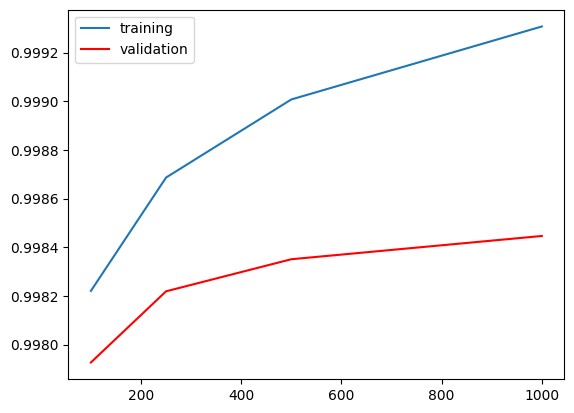

In [105]:
estimator_sizes = [100, 250, 500,1000]
train_scores = np.zeros(len(estimator_sizes))
val_scores = np.zeros(len(estimator_sizes))


for idx, n_estimators in enumerate(estimator_sizes):
    print(f'Training for {n_estimators} estimators')
    gb_model_reduced = xgb.XGBRegressor(n_estimators=n_estimators,
                              max_depth=4,
                              learning_rate=0.3,
                              random_state=42)
    gbm = gb_model_reduced.fit(X_train, y_train)
    train_score = gbm.score(X_train, y_train)
    val_score = gbm.score(X_val, y_val)
    
    train_scores[idx] = train_score
    val_scores[idx] = val_score

plt.figure()
plt.plot(estimator_sizes, train_scores,label='training')
plt.plot(estimator_sizes, val_scores,'r',label='validation')
plt.legend()
plt.show()





As we can see from this graph, the gradient boosting regressor is promissing. We will now use a randomized search cross-validation setup with more hyperparameters possibilities. This will hopefully provide us with a model that is well suited for our dataset. We will use the loguniform for the range of the learning rate and learning rates are well represented using a loguniform distribution. For the depth, we will limit it to 12 as we do not want the tree to overfit to our data. Furthermore, it is important to parralelize the computations on all available cpu as this may take a while.

In [106]:
lr_range = stats.loguniform(0.07, 1)
max_depth_range = stats.randint(2, 12)
parameters = {'n_estimators': [500,550,600,650,700, 750,800,850,900,950, 1000],
              'max_depth': max_depth_range,
              'learning_rate': lr_range}

gbm = xgb.XGBRegressor()
n_iter = 40

rs = model_selection.RandomizedSearchCV(gbm,
                                        param_distributions=parameters,
                                        refit=True,
                                        return_train_score=True,
                                        n_iter=n_iter,
                                        random_state=1,
                                        n_jobs=-1)


rs = rs.fit(X_full_train, y_full_train)

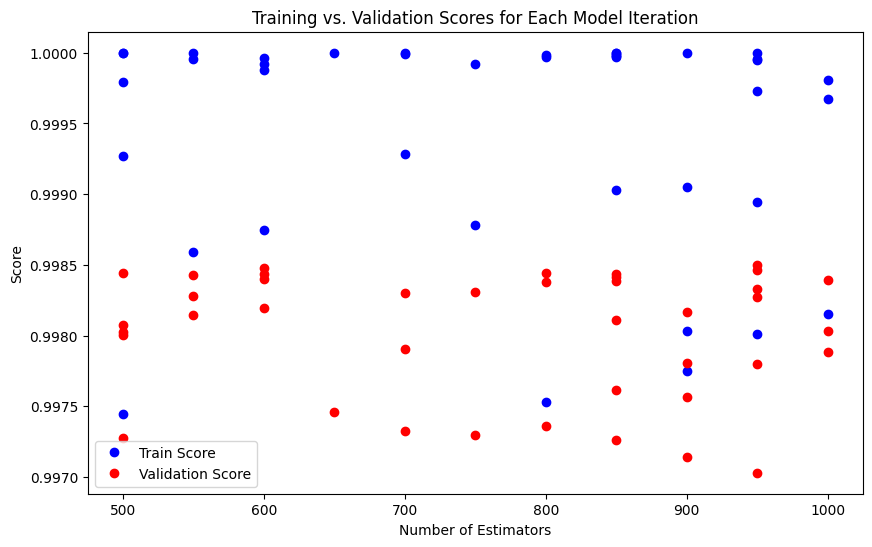

In [107]:
results = pd.DataFrame(rs.cv_results_)

plt.figure(figsize=(10, 6))

for i in range(n_iter):
    plt.plot(results.loc[i, 'param_n_estimators'], results.loc[i, 'mean_train_score'], 'bo', label='Train Score' if i == 0 else "")
    plt.plot(results.loc[i, 'param_n_estimators'], results.loc[i, 'mean_test_score'], 'ro', label='Validation Score' if i == 0 else "")

plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Training vs. Validation Scores for Each Model Iteration')
plt.legend()
plt.show()


This graph shows visually the difference score each of the random regression did. The higher the red points, the better the model performed on the validation set.

In [108]:
train_score = rs.best_score_
best_params = rs.best_params_
best_model = rs.best_estimator_
best_model.fit(X_full_train, y_full_train)
val_score = best_model.score(X_test, y_test)
print(f'Best parameters: {best_params}')
print(f'Train accuracy: {train_score:.3f}')
print(f'Validation accuracy: {val_score:.3f}')

Best parameters: {'learning_rate': 0.09618288856877881, 'max_depth': 7, 'n_estimators': 950}
Train accuracy: 0.998
Validation accuracy: 0.999


We found that the best scenario using random search cross validation is the one where the learning rate is 0.096, max_depth is 7 and the number of estimator is 950. We can see that this is promissing as the validation accuracy is very high, higher than the train accuracy

In [109]:
y_pred = best_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred)
print(f'mae of model: {mae_gb}')


mse of model: 7.355270499857233


The mean absolute error of this model is even better than the linear regression and random tree regressor! We are improving a lot

mse of model: 7.355270499857233

Let's fit on all data and create our predictions using xgb.

In [111]:
#fit for all data
best_model.fit(standardized_df, y)
xgb_prediction = best_model.predict(standardized_test_data)

We now have a very good score and a good idea of the best parameters for this model. Let's try the fitting again with less variables. Let's use the most influencual from the correlation matrix

In [86]:

rs2 = model_selection.RandomizedSearchCV(gbm,
                                        param_distributions=parameters,
                                        refit=True,
                                        return_train_score=True,
                                        n_iter=n_iter,
                                        random_state=1,
                                        n_jobs=-1)
rs_selected_columns = rs2.fit(X_full_train[selected_columns],y_full_train)

In [95]:
train_score = rs_selected_columns.best_score_
best_params = rs_selected_columns.best_params_
best_model_selected_columns = rs_selected_columns.best_estimator_
best_model_selected_columns.fit(X_full_train[selected_columns], y_full_train)
val_score = best_model_selected_columns.score(X_test[selected_columns], y_test)
y_pred = best_model_selected_columns.predict(X_test[selected_columns])
mse_boost_selected = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse_boost_selected}')
print(f'Best parameters: {best_params}')
print(f'Train accuracy: {train_score:.3f}')
print(f'Validation accuracy: {val_score:.3f}')

MSE: 13.101609302662801
Best parameters: {'learning_rate': 0.1015652601829218, 'max_depth': 4, 'n_estimators': 750}
Train accuracy: 0.996
Validation accuracy: 0.996


This model performed worse than the one with all the columns. Gradient boosting is less sensitive to multicolinearity which is why using more features does not impact that much the model.

In [82]:
y_pred_gb_reduced = best_model.predict(standardized_test_data)

In the end, gradient boosting is a very good choice for our data. It uses regularization L1 and L2 which penalises the loss function. It also learns from its mistakes and corrects them. It is also faster to learn. The key difference is that is it prone to overfitting. But with the parameter tuning techniques I used, I limit the chance of overfitting.

### Neural Network

Finaly, my last model attempt will be using neural networks and deep neural networks. It is important to understand that neural networks are trained over multiple iterations and I have done many. Although limited by the performance of my computer, I will still have some valuable results.

Below you will see my final attemps. For the sake of this project, I have commented out a line in the parameter space. This was my starting point. I started with small amounts of hidden layers. The results were promising and I pushed it even harder with more and more hidden layers. 

In [30]:
parameter_space = {
    # 'hidden_layer_sizes': [(20,20,20), (30,30,30), (18,),(30,20,10),(20,20),(30,20)],
    'hidden_layer_sizes': [(20,20,20),(10,10,10),(100,),(50,35), (30,30,30), (100,75,50),(50,50,50),(100,100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001,0.01, 0.05],
    'learning_rate_init': [0.001, 0.01]
}


mlp = MLPRegressor(max_iter=2000)
clf = RandomizedSearchCV(mlp, parameter_space, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)


clf.fit(X_full_train, y_full_train)

print('Best parameters found:\n', clf.best_params_)


y_true, y_pred = y_test, clf.predict(X_test)
print('Test set mean squared error: ', mean_squared_error(y_true, y_pred))
print('Test set mean absolute error: ', mean_absolute_error(y_true, y_pred))


C:\Users\max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\

Best parameters found:
 {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.01, 'activation': 'relu'}
Test set mean squared error:  296.80796576820336
Test set mean absolute error:  8.354718654511577


C:\Users\max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


This random search cross validation on the parameters I provided gave me the following neural network as the best candidate:

 Best parameters found:
 {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.01, 'activation': 'relu'}

Test set mean squared error:  296.80796576820336

Test set mean absolute error:  8.354718654511577

In [ ]:
best_nn_estimator = clf.best_estimator_
nn_val_score = best_nn_estimator.score(X_test, y_test)

y_pred_nn = best_nn_estimator.predict(X_test)
mse_boost_selected = mean_absolute_error(y_test, y_pred_nn)
print(f'MSE: {mse_boost_selected}')
print(f'Best params: {clf.best_params_}')
print(f'Validation accuracy: {nn_val_score:.3f}')


MSE: 8.354718654511577
Best params: {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.01, 'activation': 'relu'}
Validation accuracy: 0.998


Although being complex, we still get a good mae on the test data. So let's make a prediction

In [ ]:
neural_predictor = best_nn_estimator.predict(standardized_test_data)

C:\Users\max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


The results here are from the 3rd iterations with increased hidden layer sizes. Here we used scikit neural network with a randomized search with a lot of iterations to get a result that is good but not as good as xgboost. It takes a lot of time to train this great amount of neural networks at to try each iterations of tweaking parameters takes days. I will try and look into tensor flow and try to train on my GPU.

I will use my NVDIA RTX2070 with pytorch as it provides gpu compatibility using CUDA and cudNN.

In [144]:

model = Sequential([
    Dense(100, activation='relu', input_shape=(X_full_train[selected_columns].shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1) 
])

model.compile(optimizer=Adam(), loss='mean_absolute_error')


In [145]:
model.fit(X_full_train[selected_columns], y_full_train, validation_data=(X_test[selected_columns], y_test), epochs=20, batch_size=32)


Epoch 1/20
5223/5223 [==============================] - 10s 2ms/step - loss: 26.1031 - val_loss: 15.8595
Epoch 2/20
5223/5223 [==============================] - 9s 2ms/step - loss: 15.3128 - val_loss: 14.4181
Epoch 3/20
5223/5223 [==============================] - 9s 2ms/step - loss: 14.6457 - val_loss: 14.0852
Epoch 4/20
5223/5223 [==============================] - 9s 2ms/step - loss: 14.3640 - val_loss: 14.0428
Epoch 5/20
5223/5223 [==============================] - 8s 2ms/step - loss: 14.3359 - val_loss: 14.7782
Epoch 6/20
5223/5223 [==============================] - 9s 2ms/step - loss: 14.2071 - val_loss: 14.1502
Epoch 7/20
5223/5223 [==============================] - 9s 2ms/step - loss: 14.1396 - val_loss: 14.0010
Epoch 8/20
5223/5223 [==============================] - 8s 2ms/step - loss: 14.0977 - val_loss: 14.1225
Epoch 9/20
5223/5223 [==============================] - 8s 2ms/step - loss: 14.0278 - val_loss: 14.0193
Epoch 10/20
5223/5223 [==============================] - 9s 2ms

In [121]:
pred_tensor = model.predict(X_test)

1306/1306 [==============================] - 1s 946us/step


In [122]:
print(mean_absolute_error(pred_tensor,y_test))

8.94600509655941


We can see that with 3 layers and 100 neurons per layer, we have quite a good mae like we saw earlier but now the computations are a lot faster. Let's try and push it even more

I will build two types of neural network. One with only one layer and another with 2 to 4 layer and even more neurons. 

In [123]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
         activation=hp.Choice('activation', values=['relu', 'tanh', 'elu'])))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[0.01,0.05,0.1])),
        loss='mean_absolute_error') 
    return model



In [126]:
def build_model_deep(hp):
    model = tf.keras.Sequential()

    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=64, max_value=160, step=32),
            activation=hp.Choice('activation_' + str(i), values=['relu', 'elu'])
        ))

    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float(
    "learning_rate",
    min_value=0.001,
    max_value=1,
    step=10,
    sampling="log")),
        loss='mean_absolute_error') 
    return model


First use random search on the 1 layer neural network

In [71]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    project_name='nn_trial_4')

tuner.search(X_full_train, y_full_train,
             epochs=20,
             validation_data=(X_test, y_test))



Trial 5 Complete [00h 05m 23s]
val_loss: 9.773933092753092

Best val_loss So Far: 9.75422445933024
Total elapsed time: 00h 27m 40s


In [93]:
best_model = tuner.get_best_models(num_models=1)[0]
print(tuner.get_best_hyperparameters())
tuner.results_summary()



Results summary
Results in .\nn_trial_3
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 96
activation: elu
learning_rate: 0.01
Score: 9.75422445933024

Trial 4 summary
Hyperparameters:
units: 64
activation: elu
learning_rate: 0.01
Score: 9.773933092753092

Trial 1 summary
Hyperparameters:
units: 96
activation: elu
learning_rate: 0.05
Score: 10.473418871561686

Trial 3 summary
Hyperparameters:
units: 32
activation: elu
learning_rate: 0.05
Score: 10.65794817606608

Trial 0 summary
Hyperparameters:
units: 128
activation: tanh
learning_rate: 0.05
Score: 15.036417007446289


The best network found using a random search was 96 neurons with activation fucntion elu and a learning rate of 0.01. This was found after multiple iterations of parameter tweaking and training which took quite some time. But I changed the parameter space everytime until I converged to an acceptable solution

In [94]:
predictions = best_model.predict(X_test)

1306/1306 [==============================] - 1s 869us/step


In [95]:
print(mean_absolute_error(predictions,y_test))

9.686849593989836


We get an MAE which is not that great compared to the other techniques but let's make our predictions anyways.

In [96]:
predictions_tensor = best_model.predict(standardized_test_data)

1633/1633 [==============================] - 2s 960us/step


Now, let's try the same approach with our deep neural network

In [125]:
tuner_deep = RandomSearch(
    build_model_deep,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    project_name='nn_trial_deep')

tuner_deep.search(X_full_train, y_full_train,
             epochs=25,
             validation_data=(X_test, y_test))


Trial 5 Complete [00h 09m 54s]
val_loss: 9.591382026672363

Best val_loss So Far: 9.591382026672363
Total elapsed time: 00h 48m 34s


We can see that the result is a little better than with our 1 layer neural network but not by a lot

After sereral iteratioins, I have found out that the two best activation functions for the dataset we have are relu and elu. So I continued to tweak the model using those activation functions and several different learning rates and epoch. I did that until it became computationnaly too intense. The best result were with 3 layers of neurons and up so I continued to modify with more values. What you see now was my last attempt at finding an optimal solution beating my previous naive attemp with sklearn and random search. In the end, both solutions performed quite similarly. For further improvements, more analysis and trials and epochs run would be necessary

In [127]:

tuner_deep = Hyperband(
    build_model_deep,
    objective='val_loss',
    max_epochs=25,
    factor=3,
    executions_per_trial=3,
    directory='hyperband',
    project_name='nn_trial_deep_hyperband'
)

tuner_deep.search(X_full_train, y_full_train,
                  epochs=25,
                  validation_data=(X_test, y_test))


Trial 26 Complete [00h 09m 18s]
val_loss: 8.44648806254069

Best val_loss So Far: 8.434185663859049
Total elapsed time: 01h 29m 09s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_layers
128               |128               |units_0
relu              |elu               |activation_0
128               |160               |units_1
elu               |elu               |activation_1
0.1               |0.001             |learning_rate
128               |160               |units_2
relu              |elu               |activation_2
128               |96                |units_3
elu               |elu               |activation_3
25                |25                |tuner/epochs
0                 |9                 |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/25
5223/5223 [==============================] - 10s 2ms/step - loss: 23.8791 -

KeyboardInterrupt: 

In [128]:
best_model = tuner_deep.get_best_models(num_models=1)[0]
print(tuner_deep.get_best_hyperparameters())
tuner_deep.results_summary()

Results summary
Results in hyperband\nn_trial_deep_hyperband
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
num_layers: 3
units_0: 128
activation_0: elu
units_1: 160
activation_1: elu
learning_rate: 0.001
units_2: 160
activation_2: elu
units_3: 96
activation_3: elu
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 8.434185663859049

Trial 0025 summary
Hyperparameters:
num_layers: 4
units_0: 160
activation_0: elu
units_1: 160
activation_1: elu
learning_rate: 0.001
units_2: 128
activation_2: relu
units_3: 96
activation_3: elu
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 8.44648806254069

Trial 0017 summary
Hyperparameters:
num_layers: 3
units_0: 128
activation_0: relu
units_1: 64
activation_1: elu
learning_rate: 0.001
units_2: 160
activation_2: elu
units_3: 128
activation_3: relu
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bra

Here, we found that the best configuration in our parameter space is 4 layers (not 3 like mentionned) with first layer having 128 neurons, second 160 neurons, third 160 neurons and fourth 96 neurons. Each activation function is ely and the learning rate is 0.001. This is a deep model with a considerable amount of neurons.

In [135]:
hyperband_result = best_model.predict(X_test)
print(mean_absolute_error(hyperband_result,y_test))
best_model.fit(standardized_df,y)
hyperband_estimation = best_model.predict(standardized_test_data)

1306/1306 [==============================] - 2s 1ms/step
8.403081232298694
1633/1633 [==============================] - 2s 1ms/step


We now have a better deep neural network which is way more complex than our gradient boost regressor  and did not outperform it. This can show that for simple regression problem, simple alternative than deep neural networks can be better

# Submission and final prediction

After saving my independent predictions in different files, I used my two best predictions based on my local MAE to do an mean ensemble learning between my best performing neural network and my gradient boosting model. By doing this you combine predictions from two different types of machine learning process which can even out some flaws in either one of the models.

In [138]:
nn_data = pd.read_csv(data_folder + "nn_prediction_20240103-093240.csv")
xgb_data = pd.read_csv(data_folder + "xgb_optimized_2_20240102-151421.csv")
ensemble_predictions = (nn_data['active_power'] + xgb_data['active_power']) / 2
ensemble_predictions.head()

0   -3.060415
1    6.498723
2   -5.027745
3   -3.885687
4    2.722948
Name: active_power, dtype: float64

Create a unique filename based on timestamp:

In [139]:
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

Let's create our pandas dataframe and write it to csv. You can submit this file to Kaggle.

In [140]:
submission = pd.DataFrame(data=ensemble_predictions, columns=["active_power"])
submission.reset_index(inplace=True)
submission = submission.rename(columns = {'index':'id'})
submission.head()

,id,active_power
0,0,-3.060415
1,1,6.498723
2,2,-5.027745
3,3,-3.885687
4,4,2.722948


In [141]:
submission.to_csv(generate_unique_filename("ensemble_hyperband", "csv"), index=False)

# Reflection and notes

While I explored many machine learning models and hyperparameters tuning methods, I am still limited in computing power and time. Some algorithms took 12 hours to train while some only 45 minutes. What I learned in by doing this project is always start with a small suubset of data and when you build confidence in your models, increase the training data size. I also believe that I was careful with over and underfitting as I used powerfull tools and cross validation to ensure that my predictions were the best they could be.Finally, knowing more about the wind turbine would be benificial.